In [3]:
from phw_lib import *

In [4]:
from matplotlib.colors import LogNorm

In [5]:
# save the results in npz file
fs = 6.6
dt = 1/fs
test_num = 100

#time_duration_list = np.arange(10*1e4, 42*1e4, 2*1e4)
time_duration_list = np.arange(10*1e4, 38*1e4, 2*1e4)
res_dict_noise_time_duration = np.load('./Seq_Length_Study_SS_mag.npz', allow_pickle=True)['res_dict_noise_time_duration'][()]

# bandpass filter
lower_freq = 2.5*1e-3
upper_freq = 12.5*1e-3

search_lower_range = 3*1e-3
search_upper_range = 12*1e-3

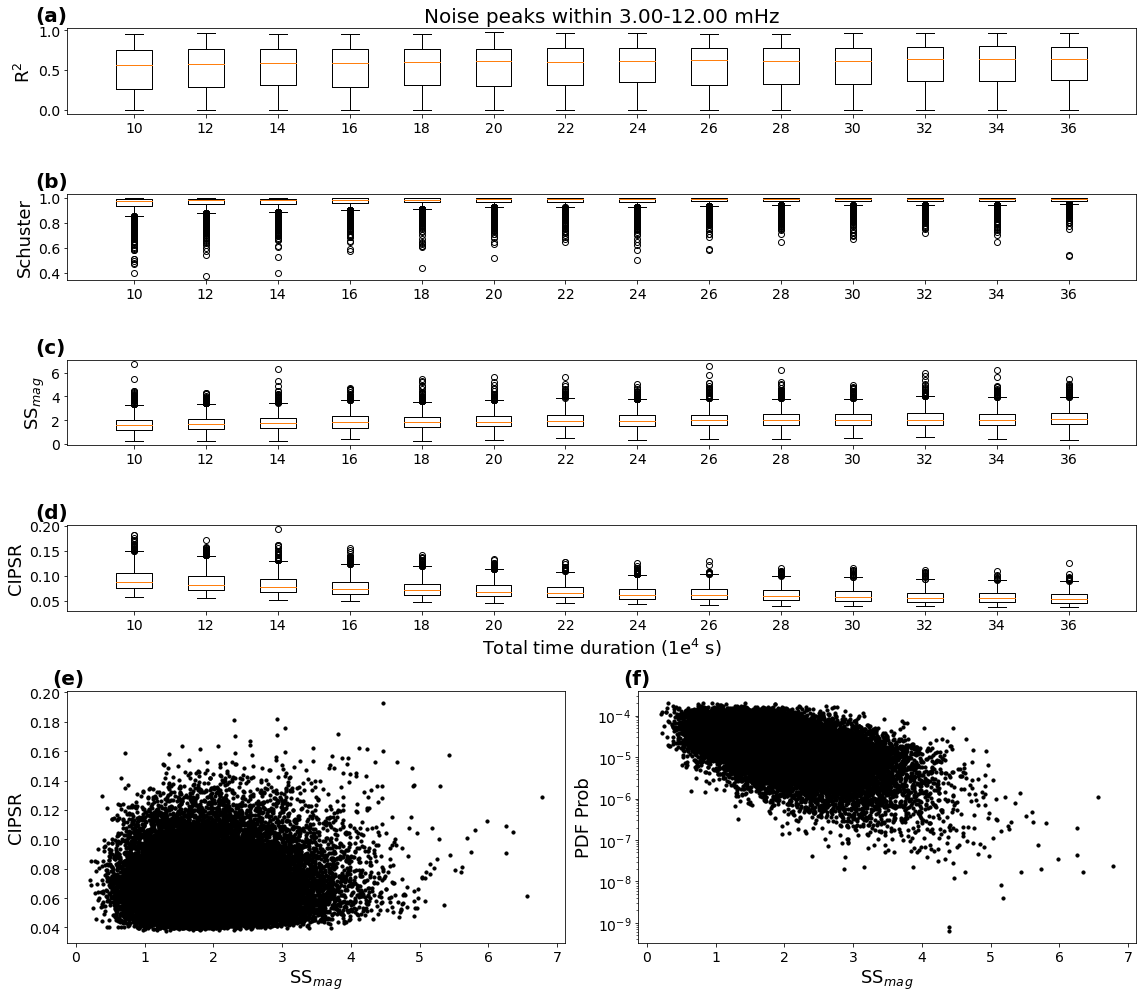

In [8]:
plt.figure(figsize=(16, 14))
ax1 = plt.subplot2grid((6, 2), (0, 0), colspan=2)
for time_duration in time_duration_list:
    plt.boxplot(np.array(res_dict_noise_time_duration[time_duration]['R_values_noise']).flatten()**2, positions=[time_duration], widths=10000)
#plt.xlabel('Total time duration (1e4s)', fontsize=16)
plt.ylabel('R$^2$', fontsize=18)
plt.title('Noise peaks within {:.2f}-{:.2f} mHz'.format(search_lower_range*1e3, search_upper_range*1e3), fontsize=20) 
# use log scale for x axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(time_duration_list, [str(int(time_duration/1e4)) for time_duration in time_duration_list])
plt.text(-0.03, 1.08, '(a)', transform=plt.gca().transAxes, size=20, weight='bold')

ax2 = plt.subplot2grid((6, 2), (1, 0), colspan=2)
for time_duration in time_duration_list:
    plt.boxplot(np.array(res_dict_noise_time_duration[time_duration]['Schuster_values_noise']).flatten(), positions=[time_duration], widths=10000)
plt.ylabel('Schuster', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(time_duration_list, [str(int(time_duration/1e4)) for time_duration in time_duration_list])
plt.text(-0.03, 1.08, '(b)', transform=plt.gca().transAxes, size=20, weight='bold')

ax3 = plt.subplot2grid((6, 2), (2, 0), colspan=2)
for time_duration in time_duration_list:
    plt.boxplot(np.array(res_dict_noise_time_duration[time_duration]['SS_mag_values_noise']).flatten(), positions=[time_duration], widths=10000)
plt.ylabel('SS$_m$$_a$$_g$', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(time_duration_list, [str(int(time_duration/1e4)) for time_duration in time_duration_list])
plt.text(-0.03, 1.08, '(c)', transform=plt.gca().transAxes, size=20, weight='bold')

ax4 = plt.subplot2grid((6, 2), (3, 0), colspan=2)
for time_duration in time_duration_list:
    # use boxplot to show the distribution instead of scatter plot
    #plt.scatter(np.ones(len(np.array(res_dict_noise_time_duration[time_duration]['Sum_ratio_values_noise']).flatten()))*time_duration, np.array(res_dict_noise_time_duration[time_duration]['Sum_ratio_values_noise']).flatten(), color='k', s=10)
    plt.boxplot(np.array(res_dict_noise_time_duration[time_duration]['Sum_ratio_values_noise']).flatten(), positions=[time_duration], widths=10000)
plt.xlabel('Total time duration (1e$^4$ s)', fontsize=18)
plt.ylabel('CIPSR', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(time_duration_list, [str(int(time_duration/1e4)) for time_duration in time_duration_list])
plt.text(-0.03, 1.08, '(d)', transform=plt.gca().transAxes, size=20, weight='bold')

ax5 = plt.subplot2grid((6, 2), (4, 0), colspan=1, rowspan=2)
# CIPSR vs Schuster
for time_duration in time_duration_list:
    plt.scatter(np.array(res_dict_noise_time_duration[time_duration]['SS_mag_values_noise']).flatten(), np.array(res_dict_noise_time_duration[time_duration]['Sum_ratio_values_noise']).flatten(), color='k', s=10)
#plt.xscale('log')
plt.text(-0.03, 1.03, '(e)', transform=plt.gca().transAxes, size=20, weight='bold')
plt.xlabel('SS$_m$$_a$$_g$', fontsize=18)
plt.ylabel('CIPSR', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax6 = plt.subplot2grid((6, 2), (4, 1), colspan=1, rowspan=2)
# PDF vs Schuster
for time_duration in time_duration_list:
    plt.scatter(np.array(res_dict_noise_time_duration[time_duration]['SS_mag_values_noise']).flatten(), np.array(res_dict_noise_time_duration[time_duration]['pdf_prob_noise']).flatten(), color='k', s=10)
# use 2d histogram to show the distribution
#SS_mag_values = np.concatenate([np.array(res_dict_noise_time_duration[time_duration]['SS_mag_values_noise']).flatten() for time_duration in time_duration_list])
#pdf_prob_values = np.concatenate([np.array(res_dict_noise_time_duration[time_duration]['pdf_prob_noise']).flatten() for time_duration in time_duration_list])
#plt.hist2d(SS_mag_values, pdf_prob_values, bins=50, cmap='Blues', norm=LogNorm())
plt.xlabel('SS$_m$$_a$$_g$', fontsize=18)
plt.ylabel('PDF Prob', fontsize=18)
plt.text(-0.03, 1.03, '(f)', transform=plt.gca().transAxes, size=20, weight='bold')
#plt.xscale('log')
plt.yscale('log')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.savefig('Figure8.jpg', dpi=600)
plt.show()
plt.close()